In [2]:
# import json
# import pprint
import pandas as pd
import numpy as np
import csv
import os
import glob
import chardet
import matplotlib.pyplot as plt

extension = 'csv'
years = [2016, 2017, 2018, 2019, 2020]
# years = [2016]
csv_data_path = r"D:\Python\IFT6758\CSV_data"
visualize_path = r"D:\Python\IFT6758\Visualize"

In [19]:
# Check the encoding type
# with open(r'D:\Python\IFT6758\CSV_data\playoffs\2016\2016030111.csv', 'rb') as f:
#     result = chardet.detect(f.read()) # or readline if the file is large
#     print(result['encoding'])
       # return ISO-8859-1

In [3]:
def combine_csv():
    for year in years:
        # Combine all .csv files for playoffs
        # set working directory for playoffs + year
        os.chdir(fr"{csv_data_path}\playoffs\{year}")

        # use glob to match the pattern 'csv'
        all_files = [i for i in glob.glob('*.{}'.format(extension))]

        # combine all files in the list
        # set encoding to 'ISO-8859-1' per the previous catching return
        combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in all_files])

        os.chdir(visualize_path)
        combined_csv.to_csv(f"{year}_playoffs.csv", index=False, encoding='ISO-8859-1')

        # Combine all .csv files for regular_season
        # set working directory for regular_season + year
        os.chdir(fr"{csv_data_path}\regular_season\{year}")

        # use glob to match the pattern 'csv'
        all_files = [i for i in glob.glob('*.{}'.format(extension))]

        # combine all files in the list
        # set the encoding to 'ISO-8859-1' per the previous catching return
        combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in all_files])

        os.chdir(visualize_path)
        combined_csv.to_csv(f"{year}_regular_season.csv", index=False, encoding='ISO-8859-1')

        # Combine two intermediate .csv files
        combine_files = [f"{year}_playoffs.csv", f"{year}_regular_season.csv"]
        combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in combine_files])
        combined_csv.to_csv(f"{year}.csv", index=False, encoding='ISO-8859-1')


In [8]:
# combine_csv()

In [4]:
def goal_vs_shot_type():
    # Select one year (2018) to analyze the relationship between goal and shot type
    df = pd.read_csv(r'D:\Python\IFT6758\Visualize\2018.csv', encoding='ISO-8859-1')
    # df.head(10)

    # Group by 'Shot Type' and 'Shot or Goal', add a 'Count' for the sum up
    df['Count'] = 1
    group_data = df.groupby(['Shot Type', 'Shot or Goal'])['Count'].sum().reset_index(name="Count")
    print(group_data)

    # Generate the figure for Q5.1
    # group_data.pivot("Shot Type","Shot or Goal","Count")[["Shot", "Goal"]].plot.bar(stacked=True, color=["blue", "red"], legend=False)
    group_data.pivot("Shot Type","Shot or Goal","Count")[["Shot", "Goal"]].plot.bar(stacked=True, color=["red", "blue"], legend=False, width=1)


      Shot Type Shot or Goal  Count
0      Backhand         Goal    824
1      Backhand         Shot   6171
2     Deflected         Goal    264
3     Deflected         Shot   1413
4     Slap Shot         Goal    783
5     Slap Shot         Shot  11458
6     Snap Shot         Goal   1213
7     Snap Shot         Shot  10750
8        Tip-In         Goal    770
9        Tip-In         Shot   3728
10  Wrap-around         Goal     60
11  Wrap-around         Shot    827
12   Wrist Shot         Goal   4322
13   Wrist Shot         Shot  43287


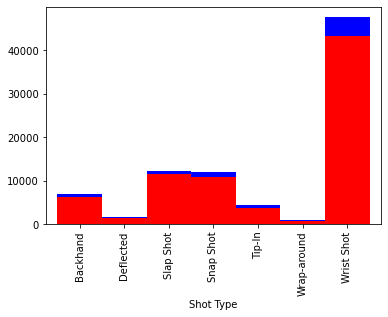

In [17]:
goal_vs_shot_type()

In [34]:
# analyze the relationship between goal and distance
def goal_vs_distance(year):
    # Select three years (2018, 2019, 2020) to analyze
    # year 2018
    df = pd.read_csv(fr'D:\Python\IFT6758\Visualize\{year}.csv', encoding='ISO-8859-1')

    # Simplify column name
    df = df.rename(columns={'X-Coordinate': 'X', 'Y-Coordinate': 'Y', 'Home or Away': 'Home'})

    # Calculate Distance
    # df['Distance'] = np.where((df.Home=='Home') ^ (df.Period%2==1), np.sqrt((df.X + 89.) ** 2 + df.Y ** 2), np.sqrt((df.X - 89.) ** 2 + df.Y ** 2))
    # df['Distance'] = np.where(df.X < 0., np.sqrt((df.X + 89.) ** 2 + df.Y ** 2), np.sqrt((df.X - 89.) ** 2 + df.Y ** 2))
    """
    X_Left_Net: -89
    Y_Left_Net: 0
    X_Right_Net: 89
    Y_Right_Net: 0
    """
    home, p_odd = df.Home == 'Home', df.Period % 2 ==1
    condition=[home&p_odd, home&~p_odd, ~home&p_odd]
    # if Home and odd period, Net is left
    choices = [np.sqrt((df.X+89.)**2 + df.Y**2), np.sqrt((df.X-89.)**2 + df.Y**2), np.sqrt((df.X+89.)**2 + df.Y**2)]
    df['Distance']=np.select(condition, choices, np.sqrt((df.X-89.)**2 + df.Y**2))
    print(df.head(2))

    # Generate the histogram of chance of goal vs distance
    df2 = df.pivot_table(index='Distance', columns='Shot or Goal', aggfunc='size', fill_value=0)
    bin_range = range(0, int(df2.index.max())+1, 10)
    df3 = df2.groupby(pd.cut(df2.index, bins=bin_range)).sum()
    df3['Goal'].div(df3.sum(1)).plot.bar(width=1)


   eventIdx           Date & Time  Period Period Time Period Time Remaining  \
0         8  2019-04-10T23:12:20Z       1       00:30                 19:30   
1        22  2019-04-10T23:17:35Z       1       03:01                 16:59   

  Period Type     Game ID              Team Name  Home Shot or Goal     X  \
0     REGULAR  2018030111  Columbus Blue Jackets  Away         Shot -57.0   
1     REGULAR  2018030111  Columbus Blue Jackets  Away         Shot -44.0   

      Y  Shooter Name         Goalie Name Scorer Name   Shot Type  \
0  29.0  Cam Atkinson  Andrei Vasilevskiy         NaN  Wrist Shot   
1  18.0  Cam Atkinson  Andrei Vasilevskiy         NaN  Wrist Shot   

   Was Net Empty Goalie Strength   Distance  
0          False             NaN  43.185646  
1          False             NaN  48.466483  


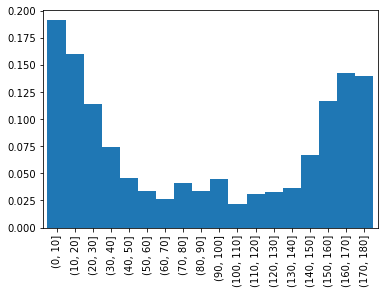

In [35]:
goal_vs_distance(2018)

   eventIdx           Date & Time  Period Period Time Period Time Remaining  \
0        19  2020-08-13T00:13:36Z       1       02:18                 17:42   
1        29  2020-08-13T00:16:25Z       1       04:15                 15:45   

  Period Type     Game ID            Team Name  Home Shot or Goal     X     Y  \
0     REGULAR  2019030111  Philadelphia Flyers  Home         Shot -56.0  -5.0   
1     REGULAR  2019030111  MontrÃ©al Canadiens  Away         Shot  54.0 -26.0   

     Shooter Name  Goalie Name Scorer Name   Shot Type  Was Net Empty  \
0  Sean Couturier  Carey Price         NaN   Snap Shot          False   
1      Joel Armia  Carter Hart         NaN  Wrist Shot          False   

  Goalie Strength    Distance  
0             NaN   33.376639  
1             NaN  145.344419  


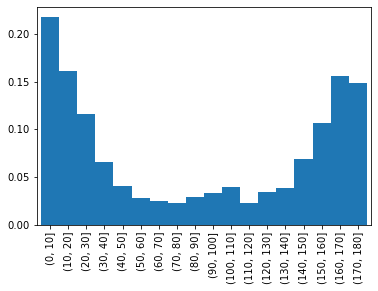

In [36]:
goal_vs_distance(2019)

In [ ]:
goal_vs_distance(2020)